In [2]:
import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


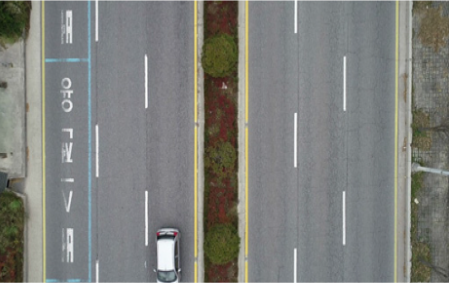

In [19]:
# 구글 드라이브 마운트
drive.mount('/content/drive')

# 이미지 불러오기
drive.mount('/content/drive')
image_path = '/content/drive/MyDrive/line.png'  # 업로드한 파일 경로
image = cv2.imread(image_path)
cv2_imshow(image)

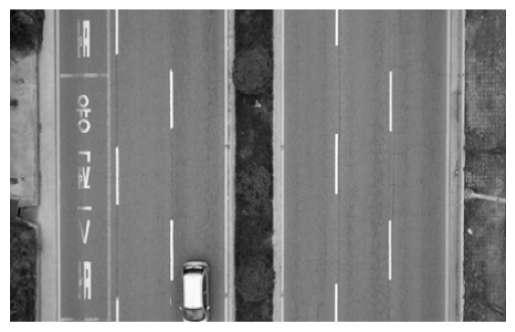

In [16]:
import matplotlib.pyplot as plt

plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.show()

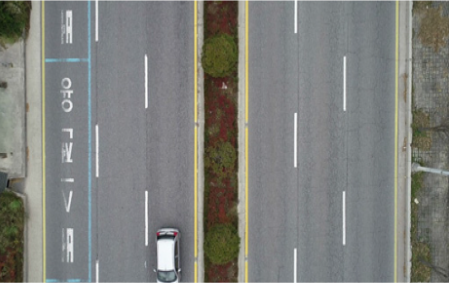

In [21]:
# 가우시안 블러 적용
blur = cv2.GaussianBlur(gray, (5, 5), 0)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cv2_imshow(image)

In [22]:
# Canny 엣지 검출 적용
edges = cv2.Canny(blur, 50, 150)

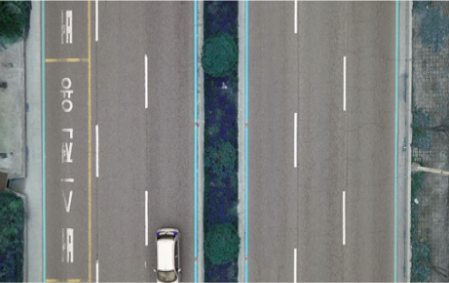

In [10]:
# 가우시안 블러 적용
blur = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(image)

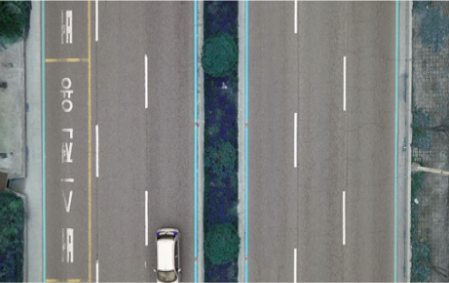

In [11]:
# Canny 엣지 검출 적용
edges = cv2.Canny(blur, 50, 150)
cv2_imshow(image)

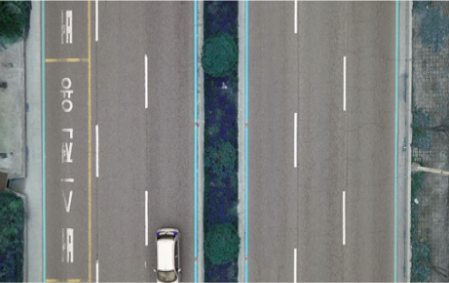

In [12]:
# 관심 영역 설정
def region_of_interest(img):
    height = img.shape[0]
    polygons = np.array([
        [(100, height), (1200, height), (600, 350)]  # 삼각형 영역 (도로 부분 강조)
    ])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

masked_edges = region_of_interest(edges)

cv2_imshow(image)

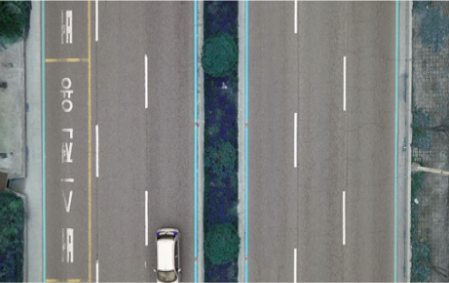

In [13]:
# 허프 변환을 이용한 선 감지
def detect_lines(img):
    lines = cv2.HoughLinesP(img, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=150)
    return lines

def draw_lines(img, lines):
    line_image = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)
    return line_image

lines = detect_lines(masked_edges)
line_image = draw_lines(image, lines)

cv2_imshow(image)

In [14]:
# 원본 이미지와 합성
combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)


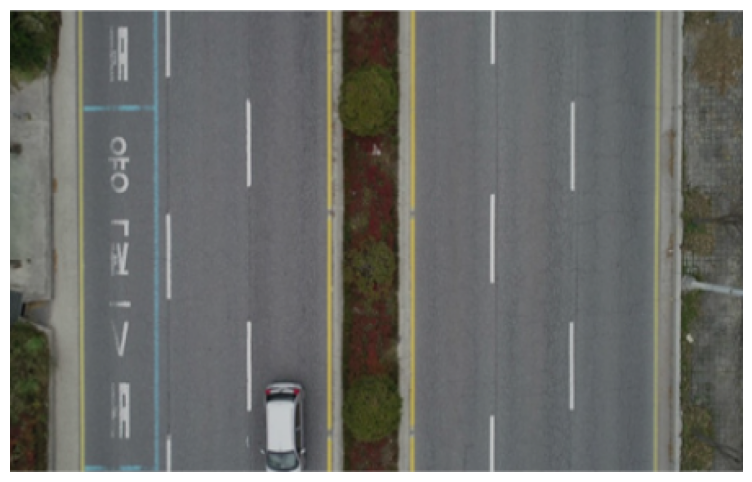

In [15]:
# 결과 출력
plt.figure(figsize=(10, 6))
plt.imshow(combo_image)
plt.axis("off")
plt.show()

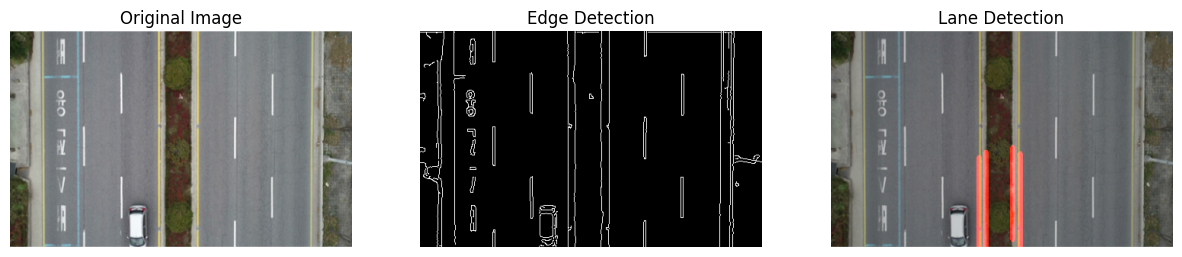

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기
image_path = '/content/drive/MyDrive/line.png'  # 업로드한 파일 경로
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 로드되므로 RGB로 변환

# 그레이스케일 변환
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 가우시안 블러 적용
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Canny 엣지 검출 적용
edges = cv2.Canny(blur, 50, 150)

# 관심 영역 설정
def region_of_interest(img):
    height = img.shape[0]
    width = img.shape[1]
    polygons = np.array([
        [(50, height), (width - 50, height), (width // 2, height // 2)]  # 삼각형 마스크 영역 설정
    ])
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

masked_edges = region_of_interest(edges)

# 허프 변환을 이용한 선 감지
def detect_lines(img):
    lines = cv2.HoughLinesP(img, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)
    return lines

def draw_lines(img, lines):
    line_image = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)
    return line_image

lines = detect_lines(masked_edges)
line_image = draw_lines(image, lines)

# 원본 이미지와 합성
combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)

# 결과 출력
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(edges, cmap='gray')
axes[1].set_title("Edge Detection")
axes[1].axis("off")

axes[2].imshow(combo_image)
axes[2].set_title("Lane Detection")
axes[2].axis("off")

plt.show()